In [1]:
import pandas as pd 
df=pd.read_csv("dataset/StudentPerformanceFactors.csv")

In [2]:
df.head(20)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [3]:
df.drop_duplicates(inplace=True)
    

In [4]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []


In [8]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
print (df.shape)

(6607, 20)


In [10]:
df.dropna(inplace=True)

In [ ]:
df.to_csv("dataset_clean.csv", index=False)


In [10]:
print(df.shape)

(6378, 20)


In [12]:
print(df.dtypes)      # Type de chaque colonne

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [12]:
def clean_student_dataset(df):
    for col in df.columns:
        #si la colone est de type object:
        if df[col].dtype == 'object':
            #enlever les espaces avant et apres:
            df[col] = df[col].str.strip()
            #n7otouhom en minuscules lkol
            df[col] = df[col].str.lower()
            # Mettre la première lettre en majuscule
            df[col] = df[col].str.capitalize()

           
            #afficher vzleurs unique apres nettoyage 
            print(f"Valeurs uniques dans la colonne '{col}' après nettoyage :")
            print(df[col].unique())
        elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
             # Convertit les valeurs en numérique, met NaN si impossible
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # Afficher la val min/ max de chaque colonne numérique
            print(f"{col}: min={df[col].min()}, max={df[col].max()}")
    duplicates= df.duplicated().sum()
    print(f"nombre de doublons detectes.{duplicates }")
    df.drop_duplicates()
    #detection des valeurs manquantes apres conversion
    missing = df.isnull().sum()
    print("Valuers manquantes par colonne :")
    print(missing)
    return df
    

            

        
  

In [13]:
df=clean_student_dataset(df)

Hours_Studied: min=1, max=44
Attendance: min=60, max=100
Valeurs uniques dans la colonne 'Parental_Involvement' après nettoyage :
['Low' 'Medium' 'High']
Valeurs uniques dans la colonne 'Access_to_Resources' après nettoyage :
['High' 'Medium' 'Low']
Valeurs uniques dans la colonne 'Extracurricular_Activities' après nettoyage :
['No' 'Yes']
Sleep_Hours: min=4, max=10
Previous_Scores: min=50, max=100
Valeurs uniques dans la colonne 'Motivation_Level' après nettoyage :
['Low' 'Medium' 'High']
Valeurs uniques dans la colonne 'Internet_Access' après nettoyage :
['Yes' 'No']
Tutoring_Sessions: min=0, max=8
Valeurs uniques dans la colonne 'Family_Income' après nettoyage :
['Low' 'Medium' 'High']
Valeurs uniques dans la colonne 'Teacher_Quality' après nettoyage :
['Medium' 'High' 'Low']
Valeurs uniques dans la colonne 'School_Type' après nettoyage :
['Public' 'Private']
Valeurs uniques dans la colonne 'Peer_Influence' après nettoyage :
['Positive' 'Negative' 'Neutral']
Physical_Activity: min=0

In [14]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High school,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High school,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [15]:
# Supprimer les espaces au début/fin des noms de colonnes
df.columns = df.columns.str.strip()

# Vérifions
print(df.columns.tolist())


['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [16]:
df.to_csv("dataset_clean.csv", index=False)


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Charger le dataset déjà nettoyé
df_clean = pd.read_csv("dataset_clean.csv")


In [18]:
ord_cols = ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", 
            "Family_Income", "Teacher_Quality", "Parental_Education_Level"]

label_encoders = {}

for col in ord_cols:
    encoder = LabelEncoder()
    df_clean[col] = encoder.fit_transform(df_clean[col])
    label_encoders[col] = encoder


In [19]:
nom_cols = ["Extracurricular_Activities", "School_Type", "Gender", 
            "Internet_Access", "Peer_Influence", 
            "Distance_from_Home", "Learning_Disabilities"]

df_clean = pd.get_dummies(df_clean, columns=nom_cols, drop_first=False)


In [20]:
df_clean.to_csv("dataset_encoded.csv", index=False)
print("Dataset encodé sauvegardé dans 'dataset_encoded.csv'")


Dataset encodé sauvegardé dans 'dataset_encoded.csv'


In [21]:
df_new = pd.read_csv("dataset_encoded.csv")

In [22]:
print(df_new.info())
print(df_new.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6378 non-null   int64
 1   Attendance                      6378 non-null   int64
 2   Parental_Involvement            6378 non-null   int64
 3   Access_to_Resources             6378 non-null   int64
 4   Sleep_Hours                     6378 non-null   int64
 5   Previous_Scores                 6378 non-null   int64
 6   Motivation_Level                6378 non-null   int64
 7   Tutoring_Sessions               6378 non-null   int64
 8   Family_Income                   6378 non-null   int64
 9   Teacher_Quality                 6378 non-null   int64
 10  Physical_Activity               6378 non-null   int64
 11  Parental_Education_Level        6378 non-null   int64
 12  Exam_Score                      6378 non-null   int64
 13  Ext

In [23]:
bool_cols=df_new.select_dtypes(include=['bool']).columns
df_new[bool_cols] = df_new[bool_cols].astype(int)

In [24]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Hours_Studied                   6378 non-null   int64
 1   Attendance                      6378 non-null   int64
 2   Parental_Involvement            6378 non-null   int64
 3   Access_to_Resources             6378 non-null   int64
 4   Sleep_Hours                     6378 non-null   int64
 5   Previous_Scores                 6378 non-null   int64
 6   Motivation_Level                6378 non-null   int64
 7   Tutoring_Sessions               6378 non-null   int64
 8   Family_Income                   6378 non-null   int64
 9   Teacher_Quality                 6378 non-null   int64
 10  Physical_Activity               6378 non-null   int64
 11  Parental_Education_Level        6378 non-null   int64
 12  Exam_Score                      6378 non-null   int64
 13  Ext

In [25]:
print(df_new.head())

   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    0   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   

   Sleep_Hours  Previous_Scores  Motivation_Level  Tutoring_Sessions  \
0            7               73                 1                  0   
1            8               59                 1                  2   
2            7               91                 2                  2   
3            8               98                 2                  1   
4            6               65                 2                  3   

   Family_Income  Teacher_Quality  ...  Internet_Access_No  \
0              1                2  ...                

In [29]:
df_new.to_csv("dataset_encoded.csv", index=False)


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns   


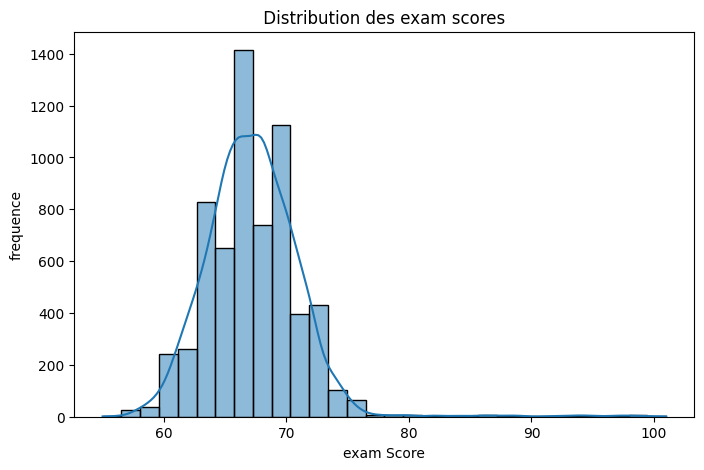

In [32]:
#2. Distribution de la variable cible (Exam_Score) --------
plt.figure(figsize=(8,5))
sns.histplot(df["Exam_Score"], kde=True, bins=30)
plt.title(" Distribution des exam scores ")
plt.xlabel("exam Score")
plt.ylabel("frequence")
plt.show()

In [33]:

print("Moyenne :", df["Exam_Score"].mean())
print("Médiane :", df["Exam_Score"].median())



Moyenne : 67.25211665098777
Médiane : 67.0


In [34]:
print("Écart-type :", df["Exam_Score"].std())


Écart-type : 3.914216506751209


In [35]:
df["Exam_Score"].describe()



count    6378.000000
mean       67.252117
std         3.914217
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

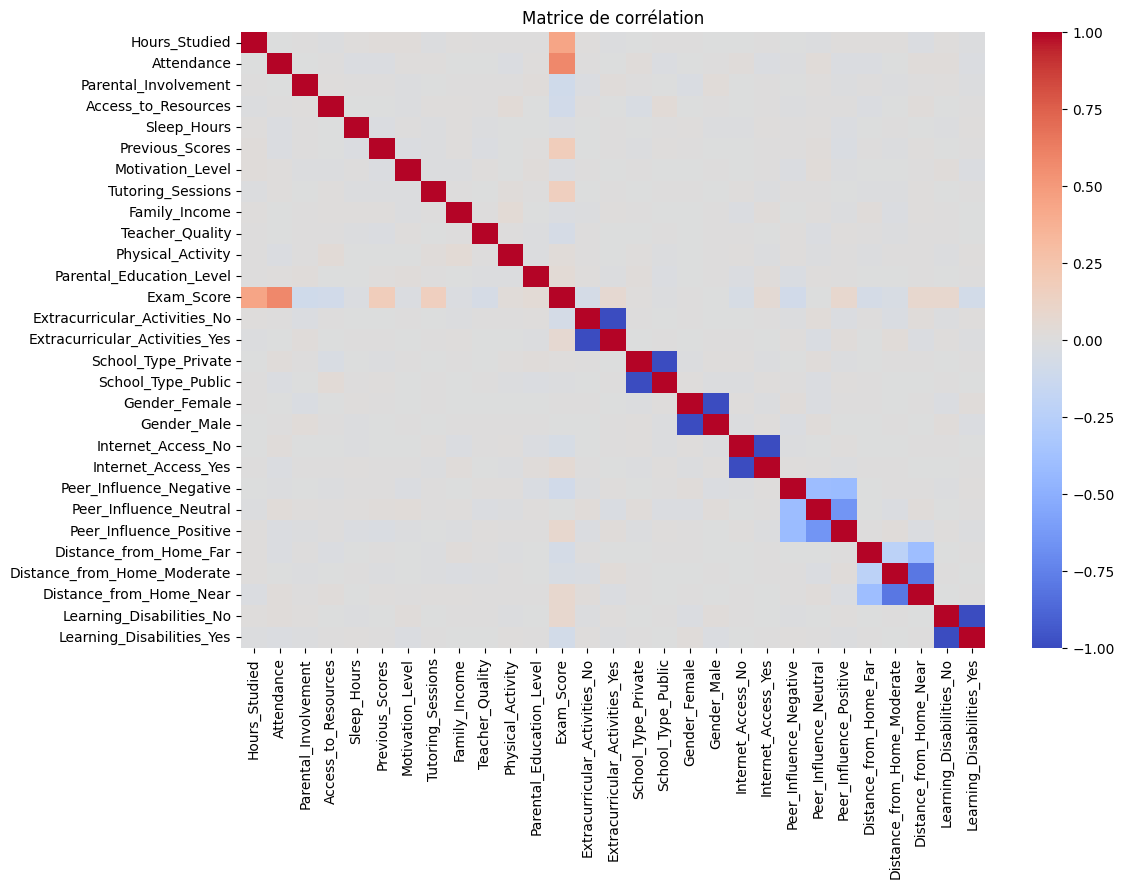

In [37]:
# -------- 3. Matrice de corrélation --------
plt.figure(figsize=(12,8))
corr = df_new.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()

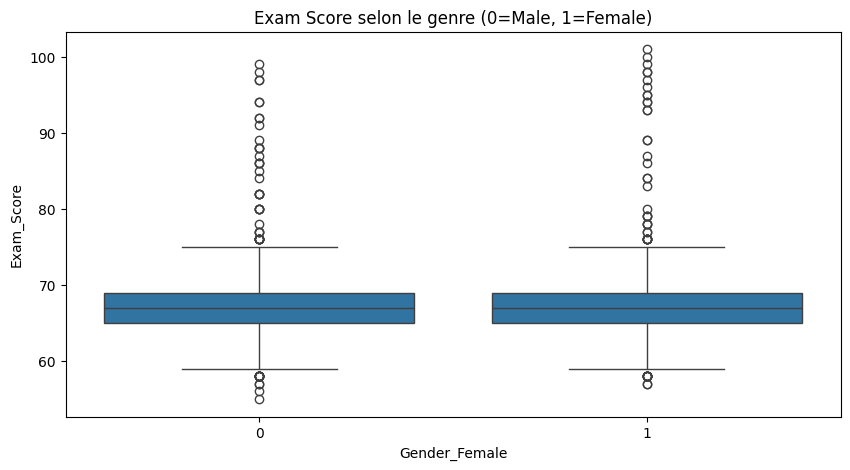

In [39]:
# -------- 4. Boxplot de la cible vs quelques variables --------
plt.figure(figsize=(10,5))
sns.boxplot(x="Gender_Female", y="Exam_Score", data=df_new)
plt.title("Exam Score selon le genre (0=Male, 1=Female)")
plt.show()

In [41]:
# Features (toutes les colonnes sauf Exam_Score)
X = df_new.drop("Exam_Score", axis=1)

# Target (la colonne à prédire)
y = df_new["Exam_Score"]


In [42]:
print("Shape de X (features):", X.shape)
print("Shape de y (target):", y.shape)


Shape de X (features): (6378, 28)
Shape de y (target): (6378,)


In [44]:
from sklearn.model_selection import train_test_split

# Séparer en train et test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Taille X_train :", X_train.shape)
print("Taille X_test  :", X_test.shape)
print("Taille y_train :", y_train.shape)
print("Taille y_test  :", y_test.shape)


Taille X_train : (5102, 28)
Taille X_test  : (1276, 28)
Taille y_train : (5102,)
Taille y_test  : (1276,)


In [45]:
from sklearn.linear_model import LinearRegression

# Créer le modèle
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)



LinearRegression()

In [46]:
y_pred = model.predict(X_test)
print("Prédictions :", y_pred[:10])  # Afficher les 10 premières prédictions


Prédictions : [73.45226512 65.47922848 70.5150274  70.31366134 67.28995741 70.85164264
 71.54031191 65.35929641 66.84714069 66.88068959]


In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² score: 0.6638761611269692
MAE: 1.0637681019768437
RMSE: 2.285418466740629


In [48]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.29264858  0.19758371 -0.40798272 -0.40307065 -0.0229248   0.04728732
 -0.17836306  0.48128585 -0.16389178 -0.25971697  0.18159169  0.16962202
 -0.27194013  0.27194013 -0.00384232  0.00384232  0.01034053 -0.01034053
 -0.4547357   0.4547357  -0.53201017  0.02371964  0.50829053 -0.40912381
 -0.07078171  0.47990552  0.43161804 -0.43161804]
Intercept: 41.45201344642254


 // polynomial regression

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Pipeline polynomial + regression linéaire
degree = 2  # tu peux tester 2, 3 ou 4
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('linear', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)

# Évaluation
print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² score: 0.7124618535700973
MAE: 0.644437798570842
RMSE: 2.113799589253413
